# Testing oscillatory response

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

from sympy import *
x, t, s, p, q, l = symbols('x, t, s, p, q, l')
init_printing(use_unicode=True)


In [2]:
def exp_part1(t, S1, tau1):
    return S1*(1 - np.exp(-t/tau1))
def exp_part2(t, S2, tau2):
    return S2*(1 - np.exp(-t/tau2))
def osc_part1(t, Sosc1, taup, Tq):
    p = -1/taup; q = 2*np.pi/Tq
    osc_part1 = Sosc1*(1 - np.exp(-t/taup)*(np.cos(q*t) + p/q*np.sin(q*t)))
    return osc_part1
def osc_part2(t, Sosc2, taup, Tq):
    p = -1/taup; q = 2*np.pi/Tq
    osc_part2 = Sosc2*(1 - np.exp(-t/taup)*(np.cos(q*t) - q/p*np.sin(q*t)))
    return osc_part2
def osc_parts(t, Sosc1, Sosc2, taup, Tq):
    p = -1/taup; q = 2*np.pi/Tq
    osc_part1 = Sosc1*(1 - np.exp(-t/taup)*(np.cos(q*t) + p/q*np.sin(q*t)))
    osc_part2 = Sosc2*(1 - np.exp(-t/taup)*(np.cos(q*t) - q/p*np.sin(q*t)))
    return osc_part1 + osc_part2

def oscillatory_model(t, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq):
    return exp_part1(t, S1, tau1) + exp_part2(t, S2, tau2) + osc_parts(t, Sosc1, Sosc2, taup, Tq)


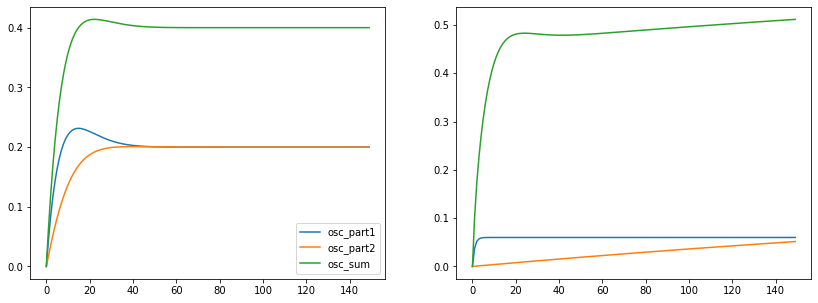

In [3]:
S1 = 0.06; S2=0.2; Sosc1=0.2; Sosc2 = 0.2
tau1 = 1; tau2 = 500;
taup = 8; Tq = 100

time = np.arange(0,150,1)

fig, ax = plt.subplots(ncols = 2, figsize = [14,5])
ax[0].plot(osc_part1(time, Sosc1, taup, Tq), label = 'osc_part1')
ax[0].plot(osc_part2(time, Sosc2, taup, Tq), label = 'osc_part2')
ax[0].plot(osc_parts(time, Sosc1, Sosc2, taup, Tq), label = 'osc_sum')
ax[0].legend()

ax[1].plot(exp_part1(time, S1, tau1))
ax[1].plot(exp_part2(time, S2, tau2))
ax[1].plot(oscillatory_model(time, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq));

## Linearly increasing forcing:

In [4]:
integral_osc1 = integrate(exp(p*(t-s))*s*sin(q*(t-s)), (s, 0, t))
integral_osc2 = integrate(exp(p*(t-s))*s*cos(q*(t-s)), (s, 0, t))
integral_exp = integrate(exp(l*(t-s))*s, (s, 0, t))

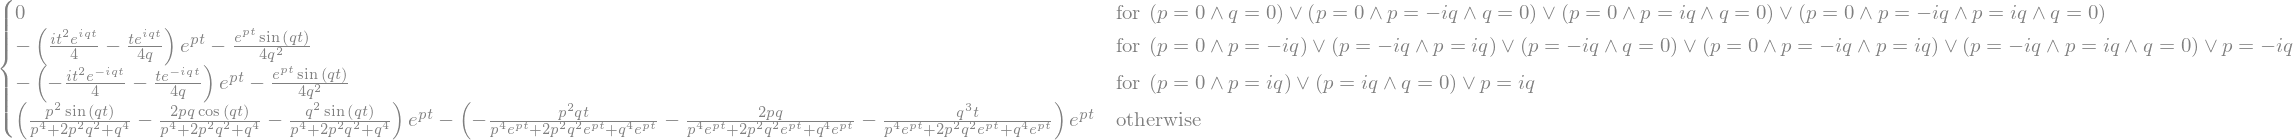

In [5]:
integral_osc1

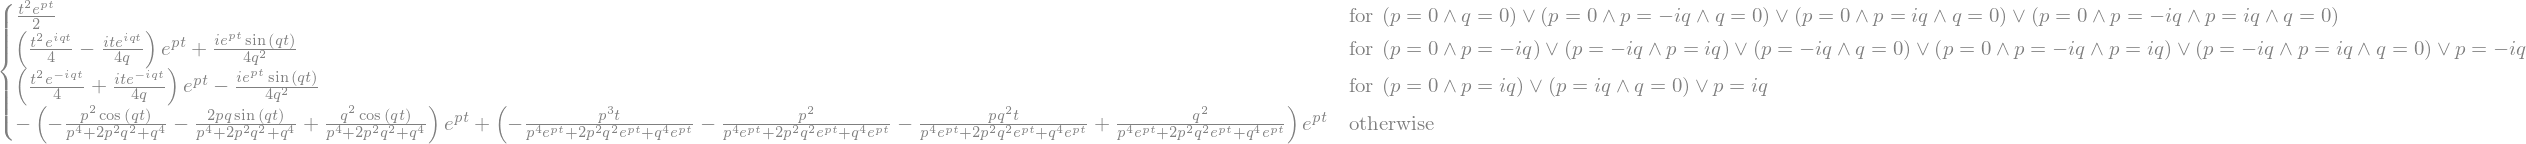

In [6]:
integral_osc2

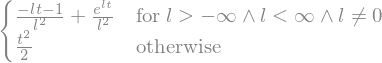

In [7]:
integral_exp

In [8]:
int_osc1 = integral_osc1.subs([(p,-1/taup), (q,2*np.pi/Tq)])
int_osc2 = integral_osc2.subs([(p,-1/taup), (q,2*np.pi/Tq)])
int_exp1 = integral_exp.subs([(l,-1/tau1)])
int_exp2 = integral_exp.subs([(l,-1/tau2)])

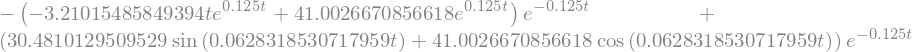

In [9]:
int_osc1

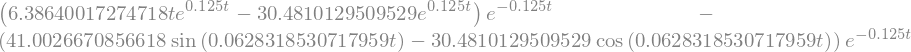

In [10]:
int_osc2

In [11]:
int_exp1

In [12]:
int_exp2

In [13]:
l1 = -1/tau1; l2 = -1/tau2; p = -1/taup; q = 2*np.pi/Tq

k_osc1 = -Sosc1*(p**2+q**2)/p
k_osc2 = Sosc2*(p**2+q**2)/q
k_exp1 = -S1*l1
k_exp2 = -S2*l2
print(k_osc1, k_osc2, k_exp1, k_exp2)

0.03131654681669719 0.062302290330576465 0.06 0.0004


In [14]:
# compute integral for discrete time values
int_table_exp1 = 1/time[-1]*k_exp1*np.array([int_exp1.subs(t,ti) for ti in time])
int_table_exp2 = 1/time[-1]*k_exp2*np.array([int_exp2.subs(t,ti) for ti in time])
int_table_osc1 = 1/time[-1]*k_osc1*np.array([int_osc1.subs(t,ti) for ti in time])
int_table_osc2 = 1/time[-1]*k_osc2*np.array([int_osc2.subs(t,ti) for ti in time])

int_sum = int_table_exp1 + int_table_exp2 + int_table_osc1 + int_table_osc2


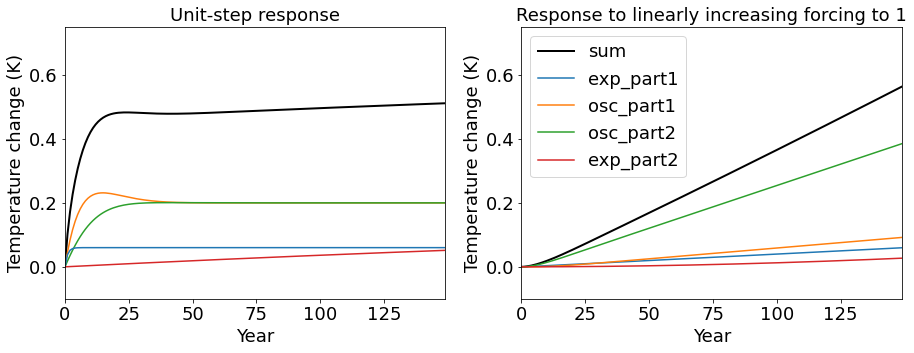

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,5])
#plt.rcParams["axes.prop_cycle"] # get the default colors
ax[0].set_title('Unit-step response',fontsize = 18)
ax[1].set_title('Response to linearly increasing forcing to 1',fontsize = 18)
time = np.arange(0,150,1)
ax[0].plot(oscillatory_model(time, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq), color = 'black', linewidth = 2, label = 'sum')
ax[0].plot(osc_part1(time, Sosc1, taup, Tq), color = '#ff7f0e', label = 'osc_part1')
ax[0].plot(osc_part2(time, Sosc2, taup, Tq), color = '#2ca02c', label = 'osc_part2')
ax[0].plot(exp_part1(time, S1, tau1), color = '#1f77b4', label = 'exp_part1')
ax[0].plot(exp_part2(time, S2, tau2), color = '#d62728', label = 'exp_part2')
ax[0].tick_params(axis='both',labelsize=18)

ax[1].plot(int_sum, color = 'black', linewidth = 2, label = 'sum')
ax[1].plot(int_table_exp1, color = '#1f77b4', label = 'exp_part1')
ax[1].plot(int_table_osc1, color = '#ff7f0e', label = 'osc_part1')
ax[1].plot(int_table_osc2, color = '#2ca02c', label = 'osc_part2')
ax[1].plot(int_table_exp2, color = '#d62728', label = 'exp_part2')
ax[1].legend(fontsize=18)

for axes in ax:
    axes.tick_params(axis='both',labelsize=18)
    axes.set_xlim(time[0], time[-1])
    axes.set_ylim(-0.1,0.75)
    axes.set_xlabel('Year', fontsize=18)
    axes.set_ylabel('Temperature change (K)', fontsize=18)
    
#plt.savefig('../Figures/example_oscillatory_responses.pdf', format='pdf', dpi=600, bbox_inches="tight")


## Decomosition of TOA imbalance for step-response

In [16]:
# need to define feedback parameters
fb1 = -1.8; fb2 = -1.1; fb3 = -0.5;

# define step-responses
def Nexp_part1(t, S1, tau1):
    return - S1*fb1*np.exp(-t/tau1)
def Nosc_part1(t, Sosc1, taup, Tq):
    p = -1/taup; q = 2*np.pi/Tq
    return - Sosc1*fb2*np.exp(p*t)*(np.cos(q*t) + p/q*np.sin(q*t))
def Nosc_part2(t, Sosc2, taup, Tq):
    p = -1/taup; q = 2*np.pi/Tq
    return - Sosc2*fb2*np.exp(p*t)*(np.cos(q*t) - q/p*np.sin(q*t))
def Nexp_part2(t, S2, tau2):
    return - S2*fb3*np.exp(-t/tau2)

def TOAimb(t, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq):
    return Nexp_part1(t, S1, tau1) + Nexp_part2(t, S2, tau2) + Nosc_part1(t, Sosc1, taup, Tq) + Nosc_part2(t, Sosc2, taup, Tq)


Text(0, 0.5, 'Change in TOA imbalance (w/$m^2$)')

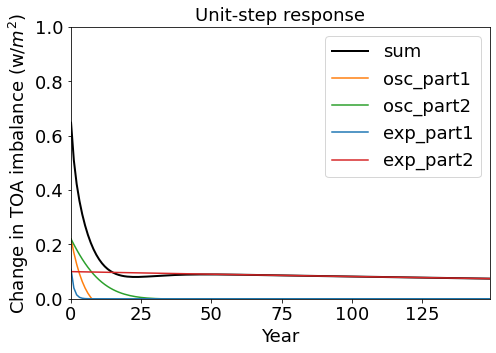

In [17]:
fig, ax = plt.subplots(figsize = [15/2,5])
#plt.rcParams["axes.prop_cycle"] # get the default colors
ax.set_title('Unit-step response',fontsize = 18)
time = np.arange(0,150,1)
ax.plot(TOAimb(time, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq), color = 'black', linewidth = 2, label = 'sum')
ax.plot(Nosc_part1(time, Sosc1, taup, Tq), color = '#ff7f0e', label = 'osc_part1')
ax.plot(Nosc_part2(time, Sosc2, taup, Tq), color = '#2ca02c', label = 'osc_part2')
ax.plot(Nexp_part1(time, S1, tau1), color = '#1f77b4', label = 'exp_part1')
ax.plot(Nexp_part2(time, S2, tau2), color = '#d62728', label = 'exp_part2')
ax.tick_params(axis='both',labelsize=18)
ax.legend(fontsize=18)

ax.tick_params(axis='both',labelsize=18)
ax.set_xlim(time[0], time[-1])
ax.set_ylim(0,1)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Change in TOA imbalance (w/$m^2$)', fontsize=18)
    
#plt.savefig('../Figures/example_oscillatory_responses.pdf', format='pdf', dpi=600, bbox_inches="tight")


## Plot TOAimbalance vs T

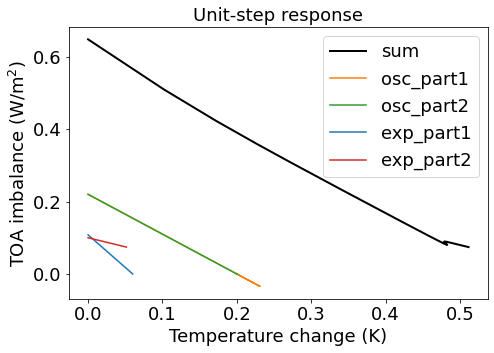

In [18]:
fig, ax = plt.subplots(figsize = [15/2,5])
#plt.rcParams["axes.prop_cycle"] # get the default colors
ax.set_title('Unit-step response',fontsize = 18)
time = np.arange(0,150,1)
ax.plot(oscillatory_model(time, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq), TOAimb(time, S1, S2, Sosc1, Sosc2, tau1, tau2, taup, Tq), color = 'black', linewidth = 2, label = 'sum')
ax.plot(osc_part1(time, Sosc1, taup, Tq), Nosc_part1(time, Sosc1, taup, Tq), color = '#ff7f0e', label = 'osc_part1')
ax.plot(osc_part2(time, Sosc2, taup, Tq), Nosc_part2(time, Sosc2, taup, Tq), color = '#2ca02c', label = 'osc_part2')
ax.plot(exp_part1(time, S1, tau1), Nexp_part1(time, S1, tau1), color = '#1f77b4', label = 'exp_part1')
ax.plot(exp_part2(time, S2, tau2), Nexp_part2(time, S2, tau2), color = '#d62728', label = 'exp_part2')
ax.tick_params(axis='both',labelsize=18)
ax.legend(fontsize=18)

ax.tick_params(axis='both',labelsize=18)
#ax.set_xlim(time[0], time[-1])
#ax.set_ylim(0,1)
ax.set_ylabel('TOA imbalance (W/m$^2$)', fontsize=18)
ax.set_xlabel('Temperature change (K)', fontsize=18);
    
#plt.savefig('../Figures/example_oscillatory_responses.pdf', format='pdf', dpi=600, bbox_inches="tight")
